EDA Stack Overflow Survey 2021

# Giới thiệu

Dữ liệu : Stack Overflow Annual Developer Survey (năm 2021)
- Cuộc khảo sát thông tin hàng năm của Stack Overflow 
- Gồm 80.000 câu trả lời từ hơn 180 quốc gia và vùng lãnh thổ. Cuộc khảo sát được thực hiện từ ngày 25/5/2021 đến 15/6/2021
- Dữ liệu có thể được tải xuống tại đây: https://insights.stackoverflow.com/survey
- Kết quả tham khảo từ StackOverFlow: https://insights.stackoverflow.com/survey/2021

Lý do chọn:
- Stack Overflow là một cộng đồng lớn và nổi tiếng, nhiều người biết đến. Đó là trang hỏi đáp tri thức về công nghệ: lập trình, thuật toán, xử lý số liệu...
- 80.000 câu trả lời là con số không nhỏ và được coi là 'đủ lớn' cho mục đích phân tích.

Mẫu phân tích:
- Stack OverFlow cho biết rằng: những người trả lời được chọn chủ yếu qua các kênh họ sở hữu. Các nguồn chủ yếu là qua danh sách email họ có; mặng lưới các blog, website, quảng cáo thuộc quyền sở hữu hoặc có liên kết; và mời bằng cách nhắn tin trực tiếp khi một ai đó truy cập vào website của họ. Vì những người trả lời được chọn theo cách này, nên khả năng cao đều là những người có tương tác cao với Stack OverFlow: có thể là thành viên của họ hoặc chỉ đơn giản là thường xuyên truy cập.
- Phương pháp lấy mẫu:
- - Họ sử dụng phương pháp lấy mẫu thuận tiện. Họ chọn mẫu dựa trên cở sở về khả năng tiếp cận, dễ gặp và tự nguyện tham gia. Phương pháp này tiết kiệm công sức cho nhà nghiên cứu nhưng mẫu có thể bị thiên lệch về một số yếu tố nào đó. Ví dụ Stack Overflow là web hỏi và đáp bằng tiếng anh nên có thể người được chọn sẽ có nền tảng học thức tốt và biết nói tiếng anh. Hoặc nếu câu hỏi mang tính suy luận, thì kết quả sẽ bị ảnh hưởng bởi thiên kiến cá nhân, và do đó nếu mẫu vô tình có một nhóm người cùng thiên kiến chiếm trọng số lớn( trong khi thực thế thì không) thì sẽ khiến kết quả là sai sót so với thực tế.
- - Do đó trước khi phân tích, cần phải kiểm tra xem quần thể mà mẫu này đại diện khác biệt thế nào với quần thể mà ta mong muốn hướng tới. Nếu khác biệt đó không theo kiểu làm ảnh hưởng đến kết cục của vấn đề mà ta quan tâm thì đây là phương pháp lấy mẫu hoàn toàn chấp nhận được.

Mục đích: tìm hiểu sơ qua về data science trong thế giới IT

# Phân tích

In [1]:
# cài đặt thư viện 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import ttest_ind, ttest_rel

%matplotlib inline

# style biểu đồ
sns.set_style('darkgrid')
plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams["font.size"] = 10
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 16

In [2]:
# thêm file csv từ google drive 
# survey results public
url_survey_results_public = 'https://drive.google.com/file/d/1r1JjyovTlthtIR04AgEOH9XWJJWwSlir/view?usp=sharing'
file_id_1 = url_survey_results_public.split('/')[-2]
path_1 = 'https://drive.google.com/uc?id=' + file_id_1

In [3]:
# survey results schema
url_survey_results_schema = 'https://drive.google.com/file/d/1tB5Vt9qO7-Lzvbp1eveAWveAodGVH1kq/view?usp=sharing'
file_id_2 = url_survey_results_schema.split('/')[-2]
path_2 = 'https://drive.google.com/uc?id=' + file_id_2

In [4]:
survey_results_public_df = pd.read_csv(path_1)

In [5]:
survey_results_public_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [6]:
survey_results_schema_df = pd.read_csv(path_2)

In [7]:
survey_results_schema_df.head()

,qname,question
0,MainBranch,Which of the following options best describes ...
1,Employment,Which of the following best describes your cur...
2,Country,Where do you live?
3,US_State,In which state or territory of the USA do you ...
4,UK_Country,In which part of the United Kingdom do you live?


In [8]:
schema = survey_results_schema_df.set_index('qname')['question']

In [9]:
# câu hỏi khảo sát
print(schema.SurveyLength)
print(schema.SurveyEase)

How do you feel about the length of the survey this year?
How easy or difficult was this survey to complete?


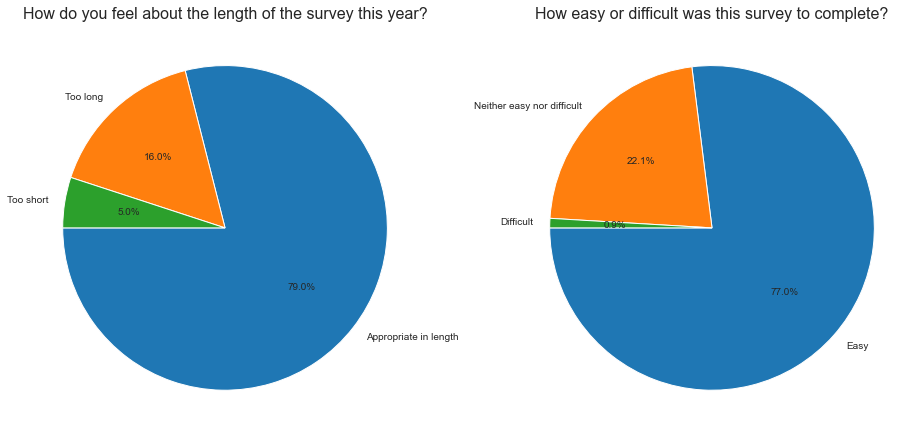

In [10]:
# phân tích "survey length" và "survey ease"
survey_length = survey_results_public_df.SurveyLength.value_counts()
survey_ease = survey_results_public_df.SurveyEase.value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,16))

ax1.pie(survey_length, labels = survey_length.index, autopct = "%1.1f%%", startangle = 180);
ax2.pie(survey_ease, labels = survey_ease.index, autopct = "%1.1f%%", startangle = 180,);

ax1.set_title("How do you feel about the length of the survey this year?")
ax2.set_title("How easy or difficult was this survey to complete?")

plt.show()

- Phần lớn người tham gia cho rằng cuộc khảo sát có độ dài vừa phải và không quá khó khăn để hoàn thành nó -> giảm bớt các các câu trả lời không trung thức, câu trả lời chọn ngẫu nhiên hoặc quá khó để lựa chọn.

In [11]:
# loại bỏ 1 số thông tin không cần thiết
survey_results_public = survey_results_public_df.drop( columns=[
    'ResponseId',
    'US_State', 'UK_Country', #đã có 'Country'
    'YearsCode', #sử dụng 'YearsCodePro'
    'OrgSize', #quy mô công ty
    'Currency', 'CompTotal', 'CompFreq', #sủ dụng 'ConvertedCompYearly'
    'OpSys', #hệ điều hành
    'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'NEWOtherComms', #không dùng đến
    'Trans', 'Sexuality','Ethnicity', 'Accessibility', 'MentalHealth' #không dùng đến
])

## 1. Một số phân tích cơ bản

In [12]:
# địa lý
survey_results_public["Country"].value_counts(normalize=True)

United States of America                                0.183224
India                                                   0.125972
Germany                                                 0.067415
United Kingdom of Great Britain and Northern Ireland    0.053632
Canada                                                  0.036098
                                                          ...   
Saint Kitts and Nevis                                   0.000012
Dominica                                                0.000012
Saint Vincent and the Grenadines                        0.000012
Tuvalu                                                  0.000012
Papua New Guinea                                        0.000012
Name: Country, Length: 181, dtype: float64

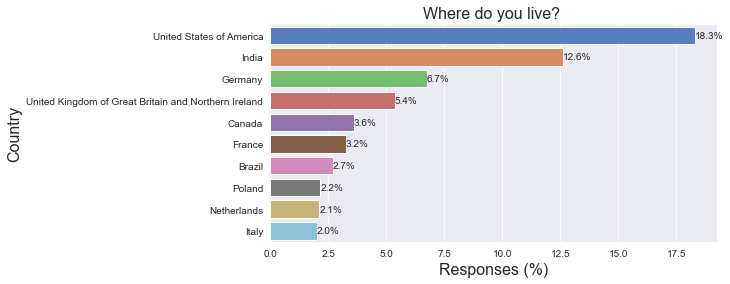

In [13]:
country_counts = survey_results_public["Country"].value_counts(normalize=True)
# chuyển thành tỉ lệ phần trăm
def convert_to_per(label_counts):
    for i in range(len(label_counts)): 
        label_counts[i] = round(label_counts[i]*100, 2)
# top 10 nước đứng đầu
convert_to_per(country_counts)
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(x=country_counts.values[:10], y=country_counts.index[:10], palette="muted", orient="h")
ax.set_title("Where do you live? ")
ax.set_xlabel("Responses (%)")
ax.set_ylabel("Country")
ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.show()

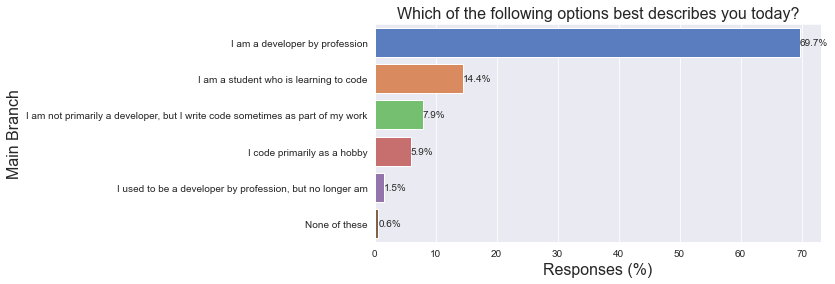

In [14]:
# phân nhóm
main_branch_counts = survey_results_public["MainBranch"].value_counts(normalize=True)
convert_to_per(main_branch_counts)
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(x= main_branch_counts.values, y= main_branch_counts.index, palette="muted", orient="h")
ax.set_title("Which of the following options best describes you today?")
ax.set_xlabel("Responses (%)")
ax.set_ylabel("Main Branch")
ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.show()

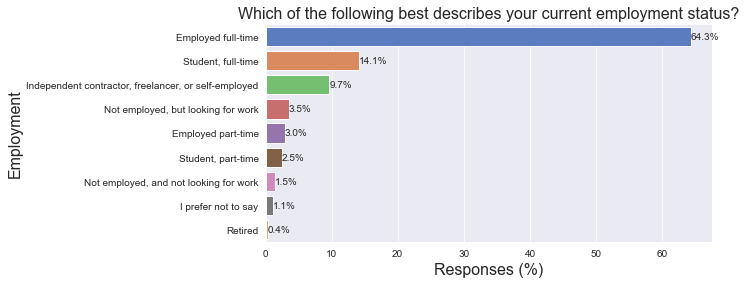

In [15]:
# việc làm
employment_counts = survey_results_public["Employment"].value_counts(normalize=True)
convert_to_per(employment_counts)
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(x= employment_counts.values, y= employment_counts.index, palette="muted", orient="h")
ax.set_title("Which of the following best describes your current employment status?")
ax.set_xlabel("Responses (%)")
ax.set_ylabel("Employment")
ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.show()

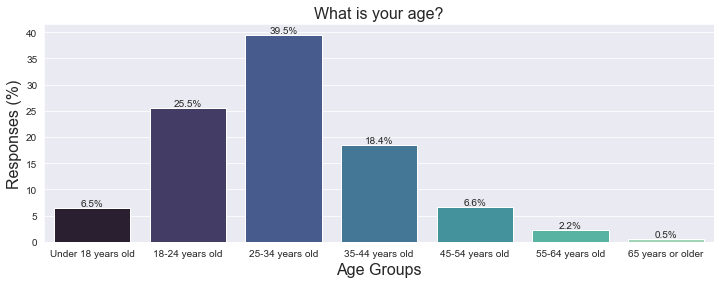

In [16]:
# nhóm tuổi
age_counts = survey_results_public["Age"].value_counts(normalize=True)
convert_to_per(age_counts)
fig, ax = plt.subplots(figsize=(12,4))
order = ['Under 18 years old', '18-24 years old', '25-34 years old',
         '35-44 years old', '45-54 years old',  '55-64 years old', '65 years or older']
ax = sns.barplot(x= age_counts.index, y= age_counts.values, order=order, palette= "mako" , orient="v")
ax.set_title("What is your age?")
ax.set_xlabel("Age Groups")
ax.set_ylabel("Responses (%)")
ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.show()

In [17]:
# giối tính
survey_results_public.Gender.value_counts()

Man                                                                                   74817
Woman                                                                                  4120
Prefer not to say                                                                      1442
Non-binary, genderqueer, or gender non-conforming                                       690
Or, in your own words:                                                                  413
Man;Or, in your own words:                                                              268
Man;Non-binary, genderqueer, or gender non-conforming                                   252
Woman;Non-binary, genderqueer, or gender non-conforming                                 147
Man;Woman                                                                                41
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:                 21
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

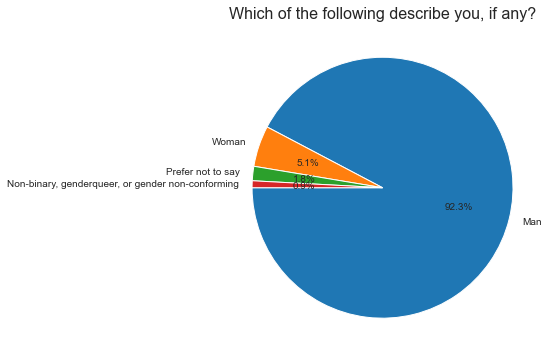

In [18]:
# giới hạn 'Gender' trong 4 giá trị: 'Man', 'Woman', 'Prefer not to say', 'Non-binary, genderqueer, or gender non-conforming'
# các câu trả lời không thuộc 4 giá trị trên sẽ được chuyển thành NaN
survey_gender = survey_results_public.copy().Gender
survey_gender.where(~(survey_gender.str.contains(';|Or, in your own words:', na = False)), other = np.nan, inplace= True )
gender_counts = survey_gender.value_counts()
plt.figure(figsize = (6,6))
plt.title("Which of the following describe you, if any?")
plt.pie(gender_counts, labels = gender_counts.index, autopct = "%1.1f%%", startangle = 180);

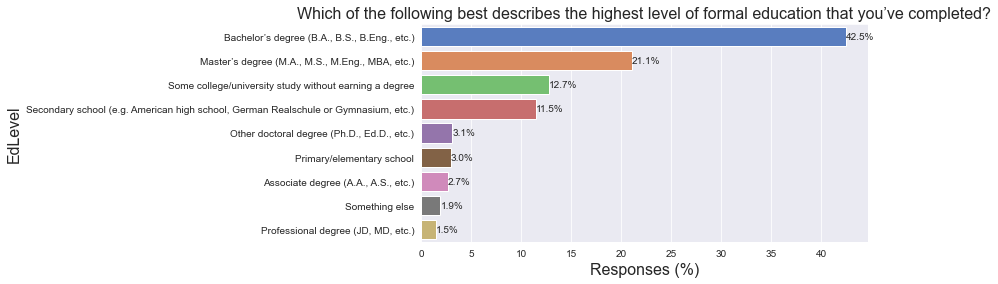

In [19]:
# bằng cấp
ed_level_counts = survey_results_public['EdLevel'].value_counts(normalize=True)
convert_to_per(ed_level_counts)
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(x= ed_level_counts.values, y= ed_level_counts.index, palette="muted", orient="h")
ax.set_title("Which of the following best describes the highest level of formal education that you’ve completed?")
ax.set_xlabel("Responses (%)")
ax.set_ylabel("EdLevel")
ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.show()

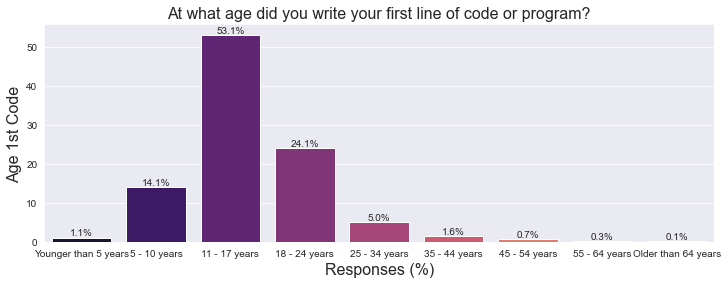

In [20]:
# tiếp xúc với lập trình
age_1st_code_counts = survey_results_public['Age1stCode'].value_counts(normalize=True)
convert_to_per(age_1st_code_counts)
fig, ax = plt.subplots(figsize=(12,4))
order = ['Younger than 5 years', '5 - 10 years', '11 - 17 years',
         '18 - 24 years', '25 - 34 years',  '35 - 44 years', '45 - 54 years', '55 - 64 years', 'Older than 64 years']
ax = sns.barplot(x= age_1st_code_counts.index, y= age_1st_code_counts.values, order=order, palette="magma", orient="v")
ax.set_title("At what age did you write your first line of code or program?")
ax.set_xlabel("Responses (%)")
ax.set_ylabel("Age 1st Code")
ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.show()

Kết luận về mẫu:
- Đa phân người tra lời đến từ Mỹ, Ấn vè các quốc gia có nhiều người nói tiếng anh. Không nhiều người ở các quốc gia ít sử dụng tiếng anh tham gia trả lời. Điều này làm cho mẫu không đại diện cho cộng đồng lập trình toàn cầu
- 70% người được hỏi cho biết họ là developer profession, 65% công việc là full time, 42.5% cho biết có bằng cử nhân và 21.1% có bằng thạc sĩ -> Cho thấy những người tham gia khảo sát đa phần đều có trình độ và có công việc ổn định.
- Đa phần người tham gia trong độ tuổi từ 18 đến 45 và họ tiếp xúc với lập trình từ lúc trẻ -> Cách tốt nhất để bắt đầu sự nghiệp là làm sớm trước khi quá muộn. Nhưng vẫn có 1 tỉ lệ nhỏ những ngưới mới bắt đầu viết code khi quá 25 tuổi vậy nên nếu bạn có quyết tâm thì tuổi tác không sao cả.
- 92,3% người trong ngành là nam giới. Nến nếu bạn là nữ thì có thể sẽ là một lợi thế lớn, bạn sẽ được ưu tiên.

- Theo nhận định cá nhân các điều trên không ảnh hưởng nhiều tới tầm quan trọng của data science, nên ta có thể sử dụng dữ liệu này cho mục đích phân tích tiếp theo.

## 2. Tìm hiểu về data science

- Công việc dữ liệu chiếm vị trí thế nào trong giới lập trình? 
- Văn hoá công nghệ của người làm về data?

### 2.1 Tỉ lệ công việc

In [21]:
dev_type_df = survey_results_public.DevType
dev_type_df.value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                          8601
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                            5467
Developer, front-end                                                                                                                                                                            

In [22]:
# câu hỏi cho phép lựa chọn nhiều đáp án nên câu trả lời có thể chứa nhiều kết quả
# hàm chuyển đổi danh sách các giá trị thành khung dữ liệu.
def split_values(col_series):
    # chuyển chuỗi thành khung
    result_df = col_series.to_frame() 
    # tạo danh sánh cột  
    options = []
    # lặp lại trên từng chỉ mục
    for  idx, values in col_series[col_series.notnull()].items():  
        # cắt giá trị thành 1 danh sách giá trị
        for option in values.split(';'):
            # tạo danh sách cột 
            if option not in result_df:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True        
    return result_df[options]

In [23]:
dev_type = split_values(dev_type_df)
dev_type_count = dev_type.mean().sort_values(ascending = False)

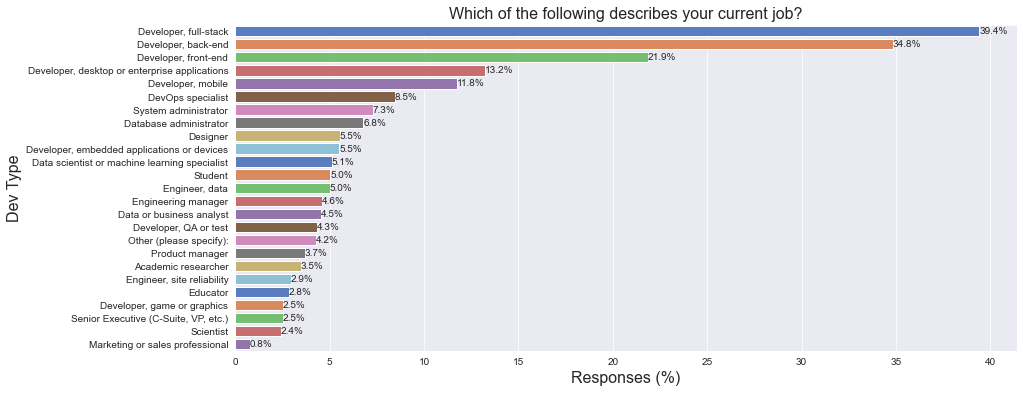

In [24]:
convert_to_per(dev_type_count)
fig, ax = plt.subplots(figsize=(14,6))
ax = sns.barplot(x= dev_type_count.values, y= dev_type_count.index, palette="muted", orient="h")
ax.set_title("Which of the following describes your current job?")
ax.set_xlabel("Responses (%)")
ax.set_ylabel("Dev Type")
ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.show()

- Các công việc data science: engineer,data ; data or business analyst; data scientist or machine learning specialist chỉ chiếm một phần nhỏ.

### 2.2 Lương và kinh nghiệm

Đánh giá dựa trên 3 yếu tố 'DevType', 'YearsCodePro', 'ConvertedCompYearly'

Giả thiết: 
- Người làm data sẽ có số năm kinh nghiệm lập trình trung bình thấp hơn mặt bằng chung.
- Người làm data sẽ có lương trung bình cao hơn lương mặt bằng chung.

In [25]:
salary = survey_results_public[["ConvertedCompYearly"]].dropna()
exp = survey_results_public[["YearsCodePro"]].dropna()

In [26]:
print(salary.dtypes)
print(exp.dtypes)

ConvertedCompYearly    float64
dtype: object
YearsCodePro    object
dtype: object


In [27]:
exp.value_counts()

YearsCodePro      
3                     5812
2                     5472
5                     5095
4                     4803
6                     3804
10                    3780
7                     3159
1                     3047
8                     2844
Less than 1 year      2699
15                    2249
20                    1835
9                     1814
12                    1733
11                    1533
13                    1267
14                    1092
16                     970
25                     907
17                     770
21                     765
18                     695
22                     653
30                     527
23                     525
24                     435
19                     392
26                     321
35                     256
27                     236
28                     222
32                     186
31                     156
40                     152
33                     148
29                     146
36       

In [28]:
# chuyển kiểu dữ liệu thành số
exp["YearsCodePro"] = exp["YearsCodePro"].replace({'Less than 1 year': '1', 'More than 50 years': '50'})
exp["YearsCodePro"] = pd.to_numeric(exp["YearsCodePro"], downcast="float")
print(exp.dtypes)

YearsCodePro    float32
dtype: object


In [29]:
salary.describe()

,ConvertedCompYearly
count,4.684400e+04
mean,1.184262e+05
std,5.272944e+05
min,1.000000e+00
25%,2.702500e+04
50%,5.621100e+04
75%,1.000000e+05
max,4.524131e+07


In [30]:
# salary min = 1 khá là vô lý, nên ta đặt ngưỡng min = 1000 (theo worldbank: Lower-middle income 1,046 – 4,095)
salary.loc[salary['ConvertedCompYearly'].abs() < 1000, 'ConvertedCompYearly' ] = 1000
salary.describe()

,ConvertedCompYearly
count,4.684400e+04
mean,1.184294e+05
std,5.272936e+05
min,1.000000e+03
25%,2.702500e+04
50%,5.621100e+04
75%,1.000000e+05
max,4.524131e+07


In [31]:
# loại bỏ outlier bằng IQR method
def outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR
    df_new = dataframe.loc[(dataframe[column] >= lower_boundary) & (dataframe[column] <= upper_boundary)]
    return df_new

In [32]:
exp = outliers(exp, 'YearsCodePro')
salary = outliers(salary, 'ConvertedCompYearly')

In [33]:
dev_type

,"Developer, mobile","Developer, front-end","Developer, desktop or enterprise applications","Developer, full-stack","Engineer, data",Other (please specify):,Data scientist or machine learning specialist,"Developer, back-end",Academic researcher,Database administrator,...,DevOps specialist,Data or business analyst,Designer,Engineering manager,"Engineer, site reliability",System administrator,Product manager,"Senior Executive (C-Suite, VP, etc.)",Educator,Marketing or sales professional
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
83435,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83436,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
83437,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
# tạo cột job phân loại data science và non-data science
conditions = [
    (dev_type['Engineer, data'] == True) | (dev_type['Data scientist or machine learning specialist'] == True) | (dev_type['Data or business analyst'] == True),
    (dev_type['Engineer, data'] == False) & (dev_type['Data scientist or machine learning specialist'] == False) & (dev_type['Data or business analyst'] == False)
    ]
choices = ['data science','other']
dev_type['job'] = np.select(conditions, choices, default=' ')
dev_type

,"Developer, mobile","Developer, front-end","Developer, desktop or enterprise applications","Developer, full-stack","Engineer, data",Other (please specify):,Data scientist or machine learning specialist,"Developer, back-end",Academic researcher,Database administrator,...,Data or business analyst,Designer,Engineering manager,"Engineer, site reliability",System administrator,Product manager,"Senior Executive (C-Suite, VP, etc.)",Educator,Marketing or sales professional,job
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,other
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,other
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,other
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,other
4,False,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,data science
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,other
83435,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,other
83436,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,data science
83437,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,other


In [35]:
job = dev_type.job

In [36]:
data_df = pd.concat([job, exp, salary], axis=1, join="inner")
data_df

,job,YearsCodePro,ConvertedCompYearly
9,data science,4.0,51552.0
11,other,5.0,46482.0
12,other,6.0,77290.0
16,other,2.0,17748.0
17,other,6.0,46135.0
...,...,...,...
83433,other,11.0,18326.0
83434,other,5.0,160500.0
83435,other,2.0,3960.0
83436,data science,4.0,90000.0


In [37]:
# exp theo nhóm
datascience_exp = data_df[data_df['job'] == 'data science']['YearsCodePro']
other_exp = data_df[data_df['job'] == 'other']['YearsCodePro']
# salary theo nhóm
datascience_salary = data_df[data_df['job'] == 'data science']['ConvertedCompYearly']
other_salary = data_df[data_df['job'] == 'other']['ConvertedCompYearly']

In [38]:
# giả thiết về lương 
# H0: không có sự khác biệt về mức lương trung bình giữa người làm data với các nghề khác
# ha: người làm data có mức lương cao hơn 
print(stats.ttest_ind(datascience_salary, other_salary, alternative='greater'))

Ttest_indResult(statistic=7.687933980988243, pvalue=7.637659287417638e-15)


- p_value < 0.05, bác bỏ giả thuyết H0 -> có sự khác biệt về mức lương 

In [39]:
# giả thiết về kinh nghiệm 
# H0: không có sự khác biệt về số năm kinh nghiệm về lập trình chuyên nghiệp giữa 2 nhóm
# Ha: người làm data có số năm kinh nghiệm lập trình chuyên nghiệp ít hơn
print(stats.ttest_ind(datascience_exp, other_exp, alternative='less'))

Ttest_indResult(statistic=1.7855475681867217, pvalue=0.9629101464144325)


- p_value > 0.05 -> không đủ căn cứ để bác bỏ giả thuyết H0

### 2.3 Văn hoá công nghệ

In [40]:
# tạo danh sách dữ liệu
tech_culture = survey_results_public[[
    'LearnCode', 
    'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
    'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
    'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
    'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
    'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
    'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
    'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
    'NEWStuck',
]]

In [41]:
job_df = job.to_frame()
job_df

,job
0,other
1,other
2,other
3,other
4,data science
...,...
83434,other
83435,other
83436,data science
83437,other


In [42]:
data_job = job_df[job_df['job']=="data science"]

In [43]:
data_science = pd.concat([data_job, tech_culture], axis=1, join="inner")
data_science.head(3)

,job,LearnCode,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWStuck
4,data science,Friend or family member,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,NaN,NaN,Flask,Flask,Apache Spark;Hadoop;NumPy;Pandas,Hadoop;NumPy;Pandas,Docker;Git;Kubernetes;Yarn,Docker;Git;Kubernetes;Yarn,Atom;IPython/Jupyter;Notepad++;PyCharm;Vim,Atom;IPython/Jupyter;Notepad++;PyCharm;Vim;Vis...,Visit Stack Overflow;Go for a walk or other ph...
9,data science,School,C++;Python,Haskell;Python,PostgreSQL,NaN,NaN,NaN,NaN,NaN,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;TensorFlow;Torch/PyTorch,Git,Git,IPython/Jupyter;Vim;Visual Studio Code,Emacs;IPython/Jupyter;Vim;Visual Studio Code,Call a coworker or friend;Visit Stack Overflow...
13,data science,School,C;C++;JavaScript;Python;R;SQL,NaN,MySQL;PostgreSQL,NaN,AWS,DigitalOcean,Flask,Vue.js,Apache Spark;Pandas;TensorFlow,NaN,Docker;Git,NaN,Atom;RStudio,NaN,Visit Stack Overflow;Go for a walk or other ph...


In [44]:
# missing data
missing_data_count = data_science.isnull().sum().sort_values(ascending=False)
missing_data_per = ((data_science.isnull().sum()/data_science.isnull().count())*100).sort_values(ascending= False)
missing_data = pd.concat([missing_data_count, missing_data_per], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
WebframeWantToWorkWith,4077,43.211447
PlatformWantToWorkWith,3942,41.780604
MiscTechWantToWorkWith,3073,32.570217
WebframeHaveWorkedWith,2897,30.704822
PlatformHaveWorkedWith,2728,28.913620
DatabaseWantToWorkWith,2450,25.967144
MiscTechHaveWorkedWith,2088,22.130366
ToolsTechWantToWorkWith,1997,21.165872
ToolsTechHaveWorkedWith,1209,12.813990
DatabaseHaveWorkedWith,1132,11.997880


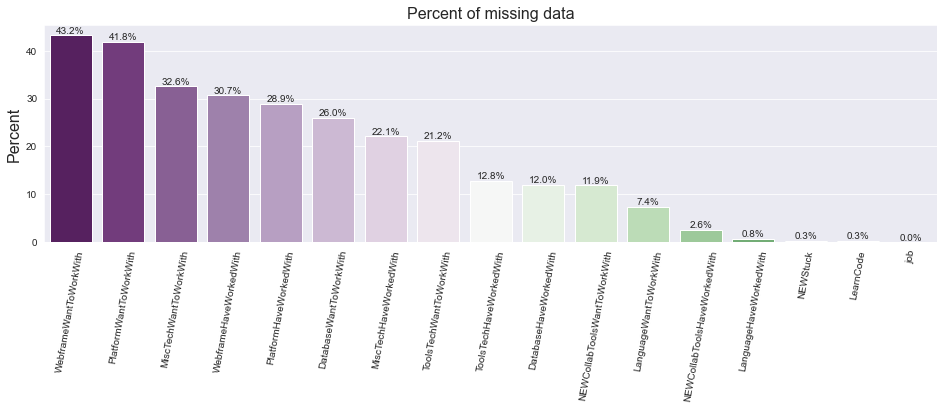

In [45]:
fig, ax = plt.subplots(figsize=(16,4))
ax = sns.barplot(x= missing_data.index, y= missing_data['Percent'], palette="PRGn")  
ax.set_title("Percent of missing data")
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.show()

Phân tích các yếu tố có missing < 25%

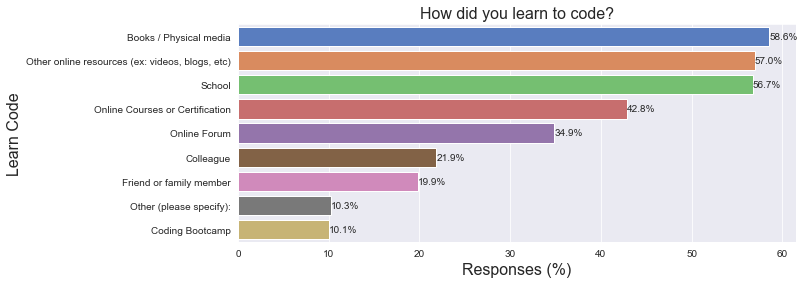

In [46]:
# phương pháp học
learn_code = split_values(data_science.LearnCode).mean().sort_values(ascending = False)
convert_to_per(learn_code)
fig, ax = plt.subplots(figsize=(10,4))
ax = sns.barplot(x= learn_code.values, y= learn_code.index, palette="muted", orient="h")
ax.set_title("How did you learn to code?")
ax.set_xlabel("Responses (%)")
ax.set_ylabel("Learn Code")
ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.show()

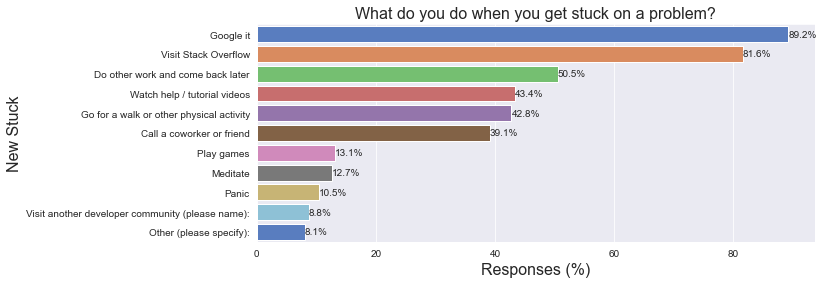

In [47]:
# xử lý vấn đề
new_stuck = split_values(data_science.NEWStuck).mean().sort_values(ascending = False)
convert_to_per(new_stuck)
fig, ax = plt.subplots(figsize=(10,4))
ax = sns.barplot(x= new_stuck.values, y= new_stuck.index, palette="muted", orient="h")
ax.set_title("What do you do when you get stuck on a problem?")
ax.set_xlabel("Responses (%)")
ax.set_ylabel("New Stuck")
ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.show()

In [48]:
# ngôn ngữ lập trình
print(schema.Language)

Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  


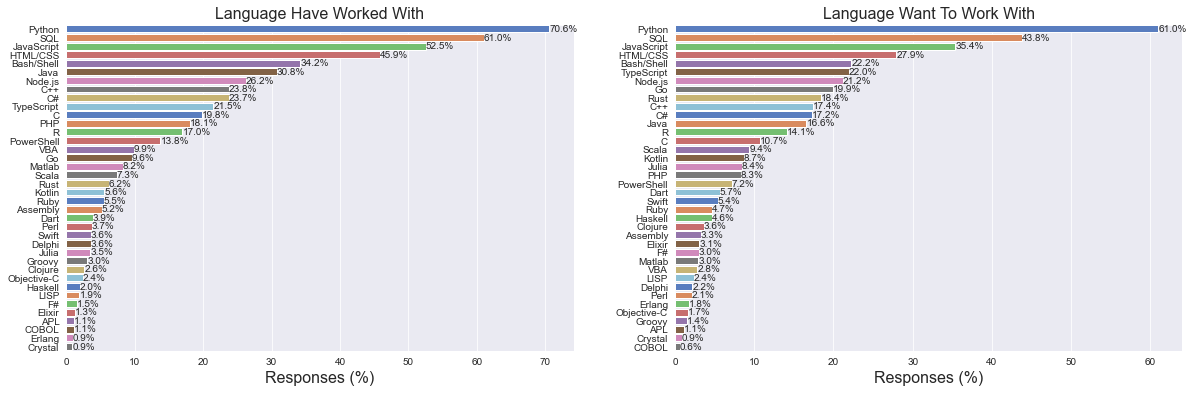

In [49]:
language_worked = split_values(data_science.LanguageHaveWorkedWith).mean().sort_values(ascending = False)
language_want = split_values(data_science.LanguageWantToWorkWith).mean().sort_values(ascending = False)
convert_to_per(language_worked)
convert_to_per(language_want)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1 = sns.barplot(x= language_worked.values, y= language_worked.index, palette="muted", orient="h", ax= ax1)
ax2 = sns.barplot(x= language_want.values, y= language_want.index, palette="muted", orient="h", ax= ax2)
ax1.set_title("Language Have Worked With")
ax2.set_title("Language Want To Work With")
ax1.set_xlabel("Responses (%)")
ax2.set_xlabel("Responses (%)")
ax1.bar_label(ax1.containers[0], fmt='%.1f%%')
ax2.bar_label(ax2.containers[0], fmt='%.1f%%')
plt.show()

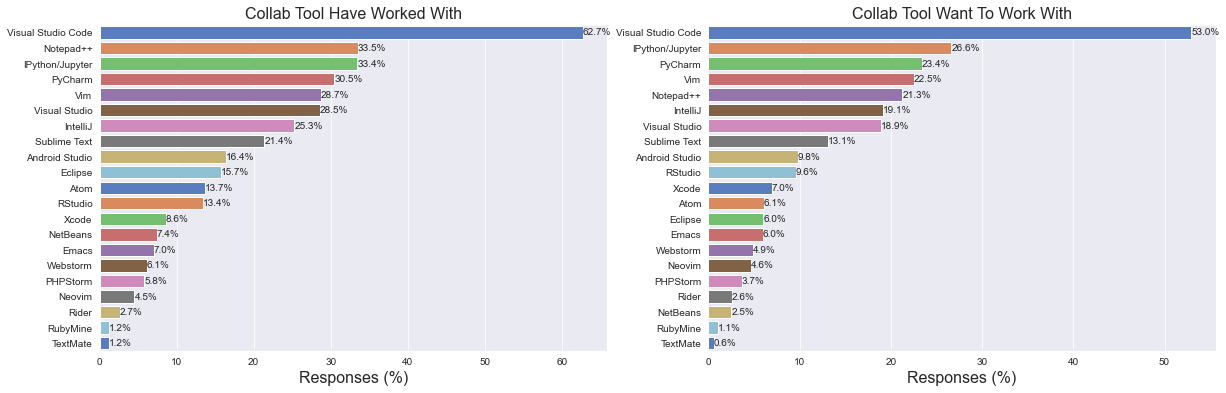

In [50]:
new_collab_tool_worked = split_values(data_science.NEWCollabToolsHaveWorkedWith).mean().sort_values(ascending = False)
new_collab_tool_want = split_values(data_science.NEWCollabToolsWantToWorkWith).mean().sort_values(ascending = False)
convert_to_per(new_collab_tool_worked)
convert_to_per(new_collab_tool_want)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1 = sns.barplot(x= new_collab_tool_worked.values, y= new_collab_tool_worked.index, palette="muted", orient="h", ax= ax1)
ax2 = sns.barplot(x= new_collab_tool_want.values, y= new_collab_tool_want.index, palette="muted", orient="h", ax= ax2)
ax1.set_title("Collab Tool Have Worked With")
ax2.set_title("Collab Tool Want To Work With")
ax1.set_xlabel("Responses (%)")
ax2.set_xlabel("Responses (%)")
ax1.bar_label(ax1.containers[0], fmt='%.1f%%')
ax2.bar_label(ax2.containers[0], fmt='%.1f%%')
plt.show()

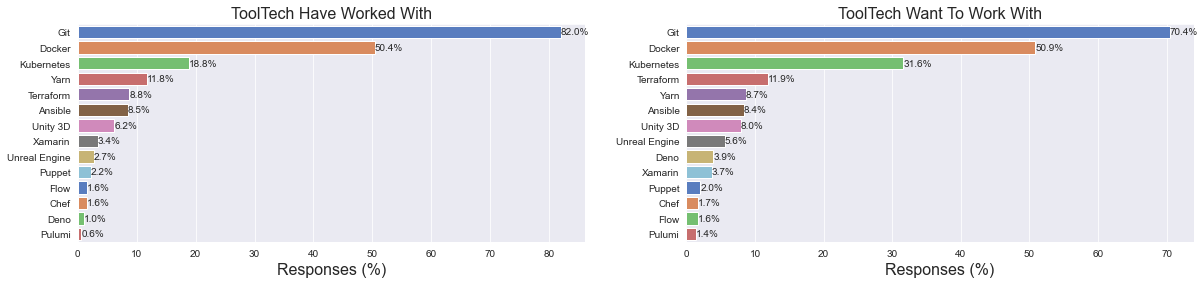

In [51]:
tooltech_worked = split_values(data_science.ToolsTechHaveWorkedWith).mean().sort_values(ascending = False)
tooltech_want = split_values(data_science.ToolsTechWantToWorkWith).mean().sort_values(ascending = False)
convert_to_per(tooltech_worked)
convert_to_per(tooltech_want)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,4))
ax1 = sns.barplot(x= tooltech_worked.values, y= tooltech_worked.index, palette="muted", orient="h", ax= ax1)
ax2 = sns.barplot(x= tooltech_want.values, y= tooltech_want.index, palette="muted", orient="h", ax= ax2)
ax1.set_title("ToolTech Have Worked With")
ax2.set_title("ToolTech Want To Work With")
ax1.set_xlabel("Responses (%)")
ax2.set_xlabel("Responses (%)")
ax1.bar_label(ax1.containers[0], fmt='%.1f%%')
ax2.bar_label(ax2.containers[0], fmt='%.1f%%')
plt.show()

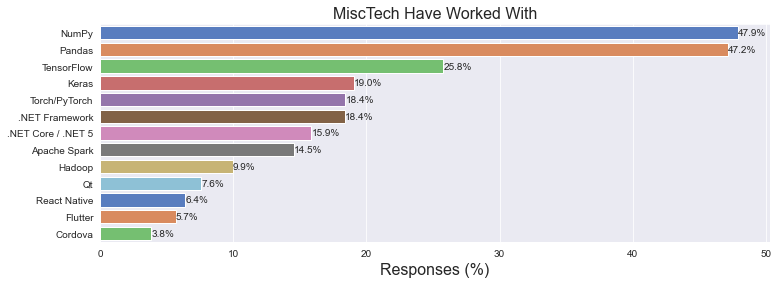

In [52]:
misctech_worked = split_values(data_science.MiscTechHaveWorkedWith).mean().sort_values(ascending = False)
convert_to_per(misctech_worked)
fig, (ax) = plt.subplots(figsize=(12,4))
ax = sns.barplot(x= misctech_worked.values, y= misctech_worked.index, palette="muted", orient="h")
ax.set_title("MiscTech Have Worked With")
ax.set_xlabel("Responses (%)")
ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.show()

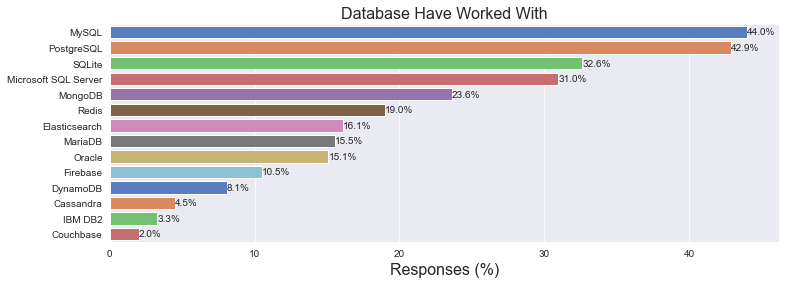

In [53]:
database_worked = split_values(data_science.DatabaseHaveWorkedWith).mean().sort_values(ascending = False)
convert_to_per(database_worked)
fig, (ax) = plt.subplots(figsize=(12,4))
ax = sns.barplot(x= database_worked.values, y= database_worked.index, palette="muted", orient="h")
ax.set_title("Database Have Worked With")
ax.set_xlabel("Responses (%)")
ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.show()

# Kết luận

- Data science không phải là 1 ngành phổ biến do đây là một ngành mới nổi trong thời gian gần đây.
- Người làm việc trong nghành có mức lương cao hơn trung bình -> có thể do công việc nhiều, người ít hoặc công việc có độ khó hơn mức trung bình.
- Không có sự khác biệt về kinh nghiệm lập trình giữa người làm data và không làm data -> đa phần những người làm data tiếp xúc với lập trình từ sớm, hoặc là người đã có kinh nghiệm lập trình trước khi đến với data science.
- Các công nghệ phổ biến liên quan đến data science: ngôn ngữ Python, SQL; database MySQL,PostgreSQL; các thư viện NumPy,Pandas,TensorFlow; VS Code; Git và Docker. 